# Deteccion Deterioro Cognitivo

Autor: Remberto López


## Laboratorio: Aplicación de CRISP-DM en la Detección de Deterioro Cognitivo

### Introducción
Este laboratorio se enfoca en la implementación del proceso CRISP-DM para un problema de detección y clasificación de deterioro cognitivo en adultos mayores. Se trabajará con un conjunto de datos que contiene 24 atributos, obtenidos de respuestas al test ACE-III. El objetivo es entrenar modelos que clasifiquen el deterioro cognitivo en cuatro categorías, cada una con un número variable de grados.

Los algoritmos de machine learning que se utilizarán incluyen regresión logística, máquinas de soporte vectorial (SVM), árboles de decisión y k-Nearest Neighbors (K-NN). Se evaluarán los modelos en términos de tasa de acierto, precisión, recall y f1-score, usando pipelines para simplificar el flujo de procesamiento.



### Pasos de CRISP-DM

#### 1. Comprensión del Negocio
   - **Objetivo**: Clasificar el grado de deterioro cognitivo en adultos mayores basado en 24 atributos de sus respuestas en el test ACE-III.
   - **Categorías de Clases**: Cuatro categorías, cada una representando un nivel de deterioro cognitivo. La primera categoría contiene 7 grados, la segunda y tercera contienen 3 cada una, y la cuarta es una categoría binaria.
   - **Éxito del Modelo**: Se busca maximizar la métrica `recall` dado que es esencial identificar correctamente los casos positivos de deterioro cognitivo.

#### 2. Comprensión de los Datos
   - Analizar la distribución de cada uno de los 24 atributos.
   - Investigar la correlación entre atributos
   - Visualizar las clases para verificar la distribución de los grados de deterioro cognitivo y observar posibles desbalances.

#### 3. Preparación de los Datos
   - **Preprocesamiento**:
     - **Limpieza**: Verificar valores faltantes y decidir cómo manejarlos (p. ej., imputación o eliminación).
     - **Codificación**: Convertir los atributos categóricos a variables numéricas si es necesario.
     - **Normalización/Estandarización**: Escalar los datos para optimizar el rendimiento de los modelos, en especial para SVM y K-NN.
   - **Reducción de Características**:
     - Aplicar al menos una técnica de reducción de características, como SelectKBest o selección basada en importancia, para ver su impacto en el modelo. Se realizará un experimento con los datos completos y otro aplicando reducción de dimensionalidad.

#### 4. Modelado
   - **Modelos Seleccionados**:
     - Regresión Logística
     - SVM
     - Árboles de Decisión
     - K-NN
   - **Pipelines**: Configurar un pipeline que incluya los pasos de preprocesamiento y entrenamiento del modelo, lo cual asegura un flujo de trabajo replicable y eficiente.
   - **Evaluación**: Utilizar la técnica de `shuffle split cross-validation` para evaluar el rendimiento de cada modelo en términos de tasa de acierto, precisión, recall y f1-score.

#### 5. Evaluación
   - Comparar el rendimiento de los modelos utilizando las métricas mencionadas, con especial énfasis en el `recall`.
   - Identificar el modelo con el mejor balance de recall, precisión, y f1-score, tanto en el experimento con todas las características como en el experimento con reducción de características.
   - Analizar y documentar el impacto de la reducción de dimensionalidad en el rendimiento de cada modelo.

#### 6. Implementación y Documentación de Resultados
   - Documentar los modelos con los mejores resultados para cada métrica, destacando los pasos del pipeline y los hiperparámetros seleccionados.
   - Incluir gráficos y tablas que muestren el rendimiento de los modelos en las diferentes clases y categorías.
   - Discutir posibles mejoras, como probar otras técnicas de reducción de características o añadir validaciones adicionales.

# Desarrollo Laboratorio

### Librerias

In [5]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, LeaveOneOut, StratifiedKFold, KFold, RandomizedSearchCV, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from tabulate import tabulate
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import numpy as np

# 1. Comprensión del negocio

* Propósito General: El proyecto tiene como finalidad desarrollar un modelo de Machine Learning capaz de clasificar el grado de deterioro cognitivo en adultos mayores. Esta clasificación se basa en la evaluación de 24 atributos derivados de las respuestas obtenidas a través del test ACE-III, un instrumento clínico que permite evaluar múltiples dominios cognitivos como la memoria, la atención y el lenguaje.

* Importancia del Proyecto: La correcta identificación del deterioro cognitivo en sus diferentes etapas es fundamental en contextos clínicos para tomar decisiones tempranas y adecuadas sobre el manejo y tratamiento del paciente. La clasificación precisa permite una intervención más oportuna, mejorando la calidad de vida del paciente.

# 2. Comprensión de los datos

## 2.1 Cargar los datos

In [2]:
df = pd.read_csv("det_con.csv")

In [3]:
df_class4 = df.drop(columns=["class_1","class_2","class_3"], axis=1)

## 2.2 Analizar la distribución de cada uno de los 24 atributos.

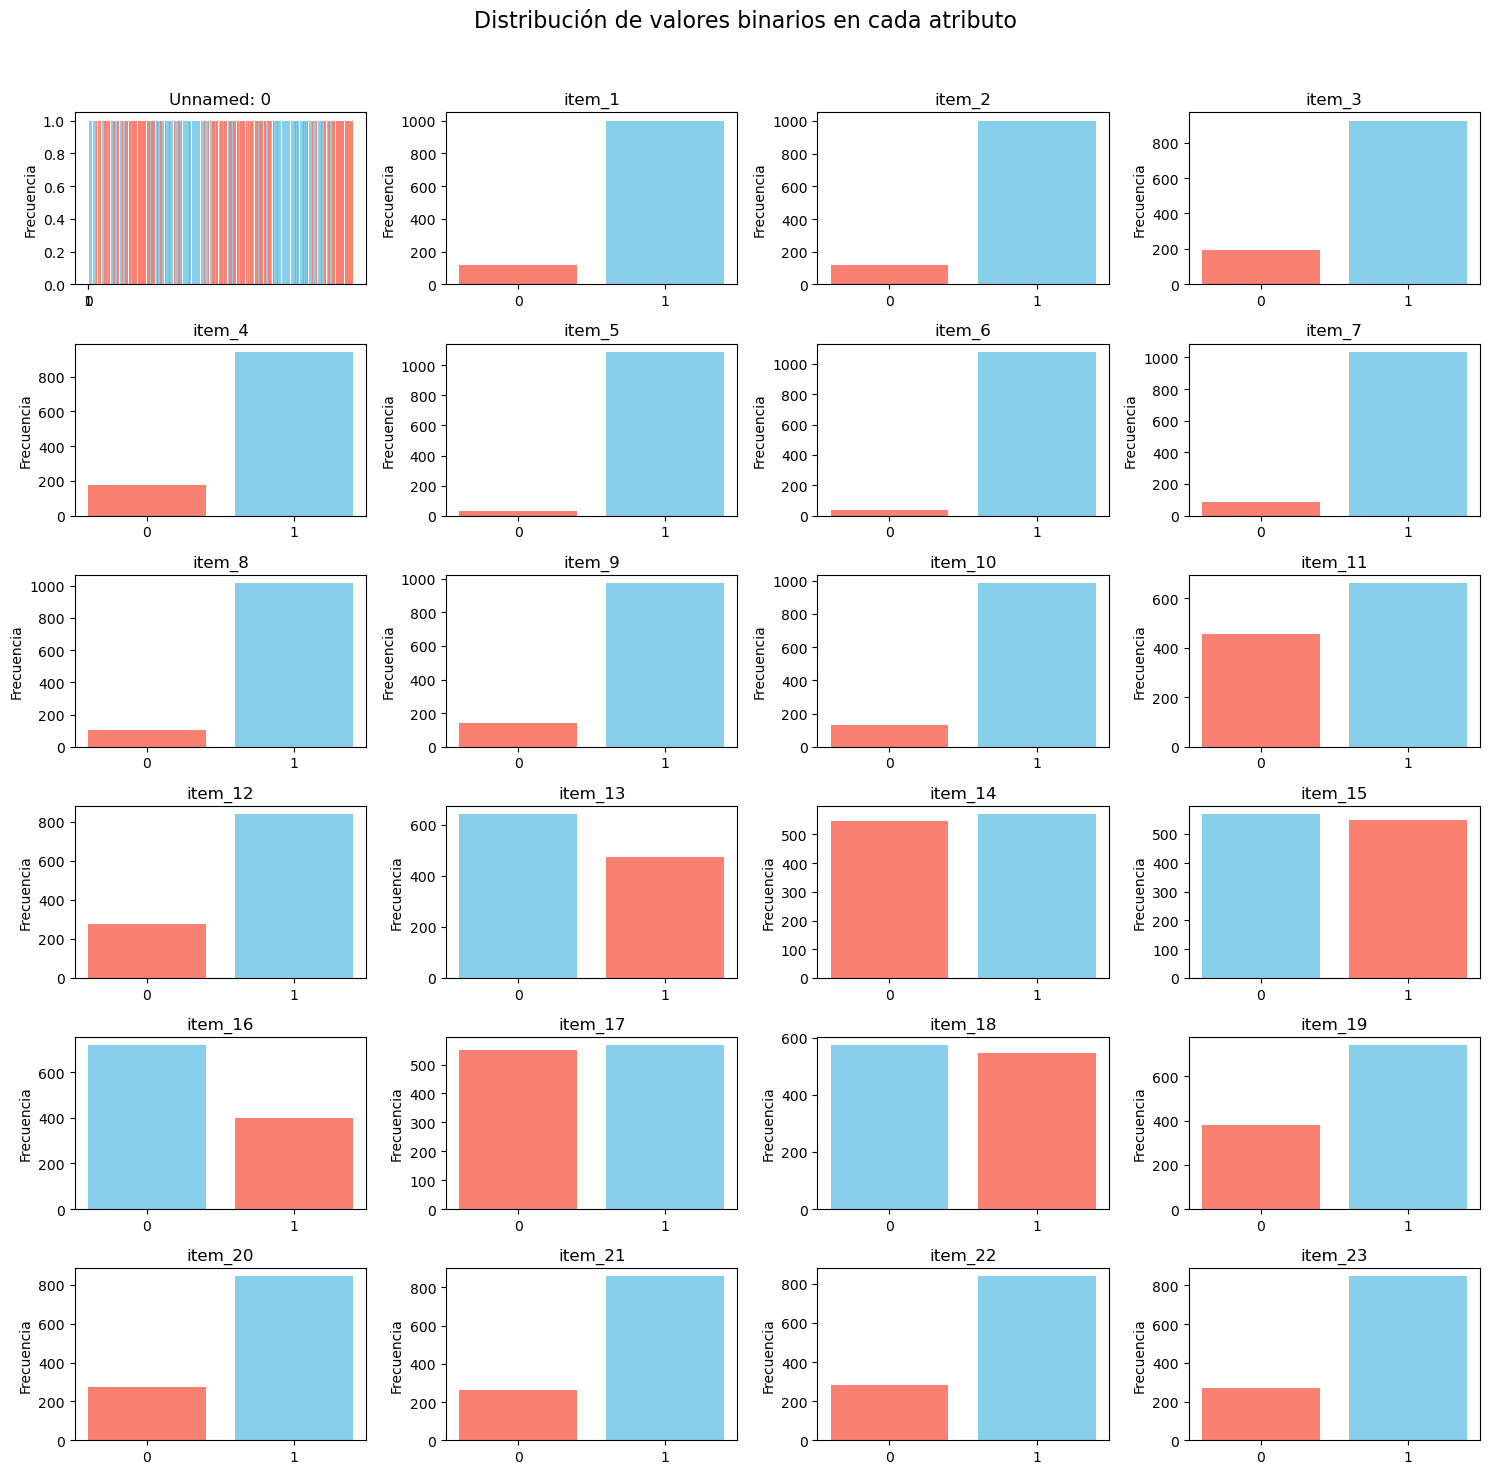

In [4]:
# Configurar el tamaño de la cuadrícula
fig, axes = plt.subplots(6, 4, figsize=(15, 15))  # 6 filas x 4 columnas para 24 gráficos
fig.suptitle('Distribución de valores binarios en cada atributo', fontsize=16)

# Generar cada gráfico de barras en su subplot
for i, column in enumerate(df.columns[:24]):
    ax = axes[i // 4, i % 4]  # Ubicar el subplot en la cuadrícula
    counts = df[column].value_counts()
    ax.bar(counts.index, counts.values, color=['skyblue', 'salmon'])
    ax.set_title(column)
    ax.set_xticks([0, 1])  # Asegura que solo se muestren 0 y 1 en el eje x
    ax.set_xticklabels(['0', '1'])
    ax.set_ylabel('Frecuencia')

# Ajustar el espacio entre subplots para evitar superposición de etiquetas
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar layout sin afectar el título global

De la imagen se puede apreciar que los atributos parecen tener diferentes distribuciones de valores, lo que podría influir en la capacidad predictiva del modelo. Un atributo con una distribución muy desequilibrada (por ejemplo, con muchos más 1 que 0) puede aportar menos información para distinguir entre las categorías del deterioro cognitivo.

## 2.3 Investigar la correlación entre atributos

Text(0.5, 1.0, 'Matriz de Correlación entre Atributos')

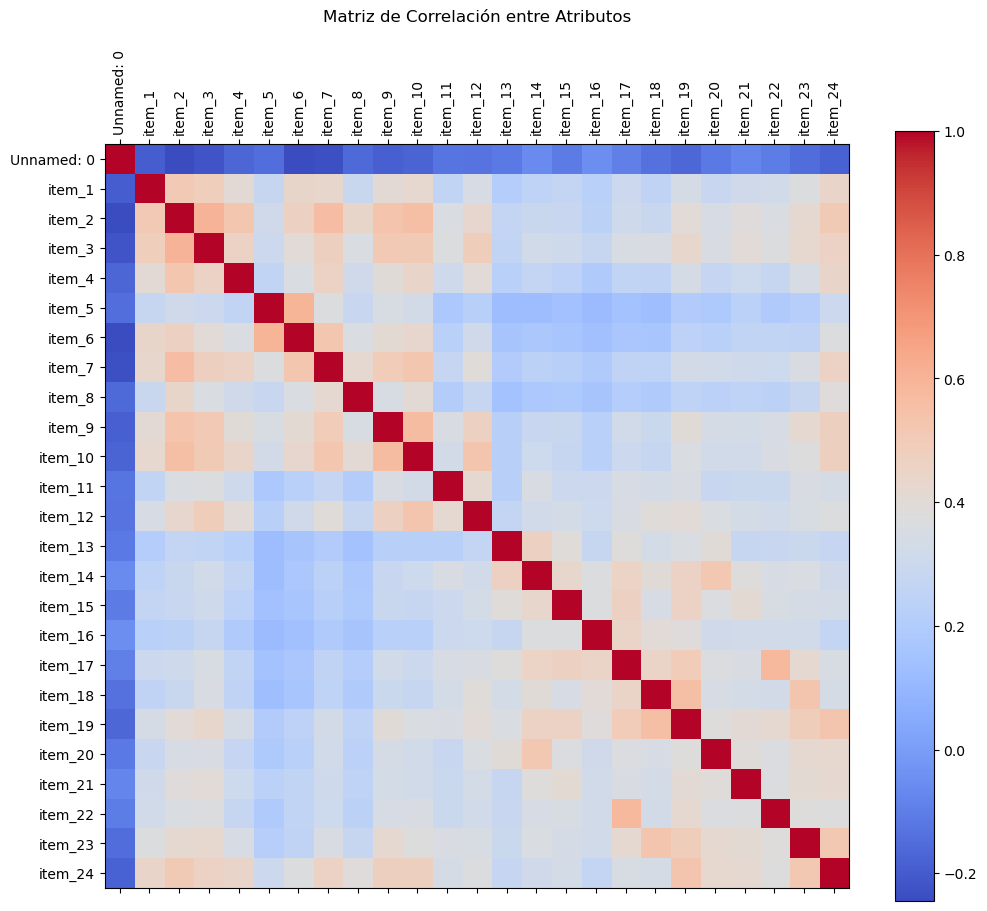

In [6]:
# Excluir las últimas cuatro columnas
df_selected = df.iloc[:, :-4]

# Calcular la matriz de correlación
correlation_matrix = df_selected.corr()

# Crear una figura para el heatmap
fig, ax = plt.subplots(figsize=(12, 10))

# Crear el mapa de calor de la matriz de correlación
cax = ax.matshow(correlation_matrix, cmap='coolwarm')

# Agregar la barra de color
fig.colorbar(cax)

# Configurar los nombres de los ejes
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)

# Título
plt.title('Matriz de Correlación entre Atributos', pad=20)

A nivel general, la correlación entre los atributos parece ser baja. En la matriz de correlación, los colores más predominantes son de tonos de azul claro y azul, lo cual indica coeficientes de correlación cercanos a 0, significando que no hay una fuerte relación lineal entre la mayoría de los atributos.

## 2.4  Visualización de la Distribución de las Clases

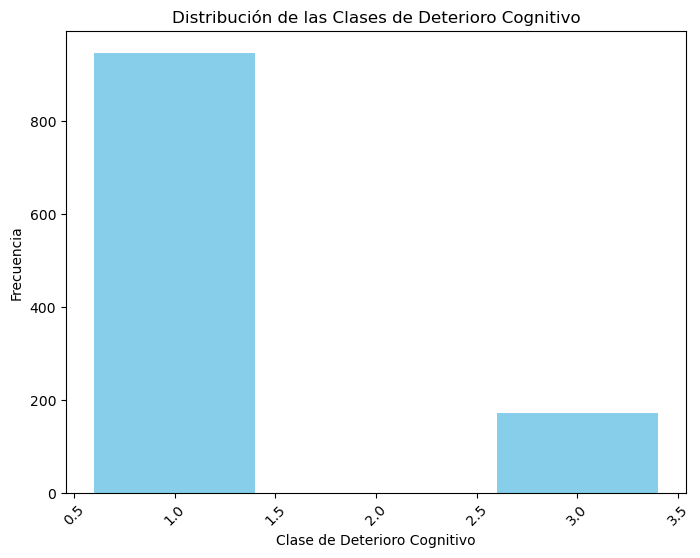

In [7]:
# Contar las ocurrencias de cada clase
class_counts = df_class4['class_4'].value_counts()  # Reemplaza 'clase' por el nombre real de la columna de clases

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color='skyblue')
plt.title('Distribución de las Clases de Deterioro Cognitivo')
plt.xlabel('Clase de Deterioro Cognitivo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si son largas
plt.show()

# 3. Preparación de los Datos

## 3.1 Verificar si existen datos con valores nulos.

In [8]:
# Verificar valores perdidos (NaN o None) en cada columna
valores_perdidos = df.isna().sum()

# Mostrar columnas con valores perdidos
print("Valores perdidos por columna:")
print(valores_perdidos)

# Verificar si hay algún valor perdido en todo el DataFrame
if valores_perdidos.any():
    print("\nEl DataFrame contiene valores perdidos (NaN o None).")
else:
    print("\nEl DataFrame no contiene valores perdidos.")

Valores perdidos por columna:
Unnamed: 0    0
item_1        0
item_2        0
item_3        0
item_4        0
item_5        0
item_6        0
item_7        0
item_8        0
item_9        0
item_10       0
item_11       0
item_12       0
item_13       0
item_14       0
item_15       0
item_16       0
item_17       0
item_18       0
item_19       0
item_20       0
item_21       0
item_22       0
item_23       0
item_24       0
class_1       0
class_2       0
class_3       0
class_4       0
dtype: int64

El DataFrame no contiene valores perdidos.


# 4. Modelado

En esta sección se realizarán los experimentos. Se harán 4 experimentos en total, siendo estos experimentos con y sin reduccion de dimensionalidad, y, experimentos con y sin estandarización de datos.

Los modelos  incluirán el preprocesamiento y entrenamiento, utilizando RandomizedSearchCV con Shuffle Split Cross-Validation para evaluar el modelo. Calculando las métricas de rendimiento en términos de tasa de acierto (accuracy), precisión, recall y f1-score.

### Modelado Estandarizado Sin Reduccion Dimensionalidad

In [4]:
X = df_class4.iloc[:,:-1]
y = df_class4.iloc[:,-1]

# Definir las métricas de evaluación
scoring = {
    'precision': make_scorer(precision_score, average='weighted', zero_division=1),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

shf = ShuffleSplit()

classifiers = {
    "Regresión Logística": {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', LogisticRegression())
        ]),
        'params': {
            'clf__C': [0.01, 0.1, 1, 10, 100],
            'clf__solver': ['liblinear', 'lbfgs']
        }
    },
    "SVM": {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', SVC())
        ]),
        'params': {
            'clf__C': [0.01, 0.1, 1, 10, 100],
            'clf__kernel': ['linear', 'rbf']
        }
    },
    "Árboles de Decisión": {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', DecisionTreeClassifier())
        ]),
        'params': {
            'clf__max_depth': [None, 10, 20, 30],
            'clf__min_samples_split': [2, 5, 10]
        }
    },
    "K-NN": {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', KNeighborsClassifier())
        ]),
        'params': {
            'clf__n_neighbors': [3, 5, 7, 9],
            'clf__weights': ['uniform', 'distance']
        }
    }
}

results = []

for name, config in classifiers.items():
    model = config['model']
    param_grid = config['params']

    # Configuración de GridSearchCV
    randomized_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        cv=shf,
        scoring=scoring,
        refit='recall',  # Optimizar el modelo para el f1-score
        n_jobs=-1    # Usar todos los núcleos disponibles
    )

    # Ajustar el modelo y encontrar los mejores hiperparámetros
    randomized_search.fit(X, y)

    # Extraer las métricas para el mejor modelo
    best_precision = randomized_search.cv_results_['mean_test_precision'][randomized_search.best_index_]
    best_recall = randomized_search.cv_results_['mean_test_recall'][randomized_search.best_index_]
    best_f1 = randomized_search.cv_results_['mean_test_f1'][randomized_search.best_index_]

    # Extraer los mejores hiperparámetros
    best_params = randomized_search.best_params_

    # Formatear los hiperparámetros para que se muestren correctamente en la tabla
    best_params_str = ", ".join([f"{k}: {v}" for k, v in best_params.items()])

    # Almacenar los resultados con hiperparámetros
    results.append([name, best_precision, best_recall, best_f1, best_params_str])

# Generar la tabla en formato LaTeX usando tabulate
latex_table = tabulate(
    results,
    headers=["Algoritmo", "Precisión", "Recall", "F1-Score", "Hiperparámetros"],
    tablefmt="latex",
    floatfmt=".4f"
)

print(latex_table)

c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


\begin{tabular}{lrrrl}
\hline
 Algoritmo           &   Precisión &   Recall &   F1-Score & Hiperparámetros                                \\
\hline
 Regresión Logística &      0.9187 &   0.9205 &     0.9153 & clf\_\_solver: lbfgs, clf\_\_C: 0.1                \\
 SVM                 &      0.9288 &   0.9295 &     0.9239 & clf\_\_kernel: linear, clf\_\_C: 0.1               \\
 Árboles de Decisión &      0.8880 &   0.8911 &     0.8882 & clf\_\_min\_samples\_split: 10, clf\_\_max\_depth: 10 \\
 K-NN                &      0.9178 &   0.9187 &     0.9115 & clf\_\_weights: uniform, clf\_\_n\_neighbors: 9     \\
\hline
\end{tabular}


#### Sin Estandarizar Con Reduccion Dimensionalidad

In [10]:
X = df_class4.iloc[:,:-1]
y = df_class4.iloc[:,-1]

# Definir las métricas de evaluación
scoring = {
    'precision': make_scorer(precision_score, average='weighted', zero_division=1),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

shf = ShuffleSplit()

classifiers = {
    "Regresión Logística": {
        'model': Pipeline([
            ('feature_selection', SelectKBest(f_classif)),
            ('clf', LogisticRegression())
        ]),
        'params': {
            'clf__C': [0.01, 0.1, 1, 10, 100],
            'clf__solver': ['liblinear', 'lbfgs']
        }
    },
    "SVM": {
        'model': Pipeline([
            ('feature_selection', SelectKBest(f_classif)),
            ('clf', SVC())
        ]),
        'params': {
            'clf__C': [0.01, 0.1, 1, 10, 100],
            'clf__kernel': ['linear', 'rbf']
        }
    },
    "Árboles de Decisión": {
        'model': Pipeline([
            ('feature_selection', SelectKBest(f_classif)),
            ('clf', DecisionTreeClassifier())
        ]),
        'params': {
            'clf__max_depth': [None, 10, 20, 30],
            'clf__min_samples_split': [2, 5, 10]
        }
    },
    "K-NN": {
        'model': Pipeline([
            ('feature_selection', SelectKBest(f_classif)),
            ('clf', KNeighborsClassifier())
        ]),
        'params': {
            'clf__n_neighbors': [3, 5, 7, 9],
            'clf__weights': ['uniform', 'distance']
        }
    }
}

results = []

for name, config in classifiers.items():
    model = config['model']
    param_grid = config['params']

    # Configuración de GridSearchCV
    randomized_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        cv=shf,
        scoring=scoring,
        refit='recall',  # Optimizar el modelo para el f1-score
        n_jobs=-1    # Usar todos los núcleos disponibles
    )

    # Ajustar el modelo y encontrar los mejores hiperparámetros
    randomized_search.fit(X, y)

    # Extraer las métricas para el mejor modelo
    best_precision = randomized_search.cv_results_['mean_test_precision'][randomized_search.best_index_]
    best_recall = randomized_search.cv_results_['mean_test_recall'][randomized_search.best_index_]
    best_f1 = randomized_search.cv_results_['mean_test_f1'][randomized_search.best_index_]

    # Extraer los mejores hiperparámetros
    best_params = randomized_search.best_params_

    # Formatear los hiperparámetros para que se muestren correctamente en la tabla
    best_params_str = ", ".join([f"{k}: {v}" for k, v in best_params.items()])

    # Almacenar los resultados con hiperparámetros
    results.append([name, best_precision, best_recall, best_f1, best_params_str])

# Generar la tabla en formato LaTeX usando tabulate
latex_table = tabulate(
    results,
    headers=["Algoritmo", "Precisión", "Recall", "F1-Score", "Hiperparámetros"],
    tablefmt="latex",
    floatfmt=".4f"
)

print(latex_table)

c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


\begin{tabular}{lrrrl}
\hline
 Algoritmo           &   Precisión &   Recall &   F1-Score & Hiperparámetros                                \\
\hline
 Regresión Logística &      0.9216 &   0.9241 &     0.9199 & clf\_\_solver: lbfgs, clf\_\_C: 0.1                \\
 SVM                 &      0.9208 &   0.9223 &     0.9154 & clf\_\_kernel: linear, clf\_\_C: 0.1               \\
 Árboles de Decisión &      0.9026 &   0.9027 &     0.8919 & clf\_\_min\_samples\_split: 10, clf\_\_max\_depth: 30 \\
 K-NN                &      0.9326 &   0.9357 &     0.9313 & clf\_\_weights: uniform, clf\_\_n\_neighbors: 9     \\
\hline
\end{tabular}


### Modelo Estandarizado y Con Reduccion Dimensionalidad

In [6]:
X = df_class4.iloc[:,:-1]
y = df_class4.iloc[:,-1]

# Definir las métricas de evaluación
scoring = {
    'precision': make_scorer(precision_score, average='weighted', zero_division=1),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

shf = ShuffleSplit()


classifiers = {
    "Regresión Logística": {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('feature_selection', SelectKBest(f_classif)),
            ('clf', LogisticRegression())
        ]),
        'params': {
            'feature_selection__k': [5, 10, 15],
            'clf__C': [0.01, 0.1, 1, 10, 100],
            'clf__solver': ['liblinear', 'lbfgs']
        }
    },
    "SVM": {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('feature_selection', SelectKBest(f_classif)),
            ('clf', SVC())
        ]),
        'params': {
            'feature_selection__k': [5, 10, 15],
            'clf__C': [0.01, 0.1, 1, 10, 100],
            'clf__kernel': ['linear', 'rbf']
        }
    },
    "Árboles de Decisión": {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('feature_selection', SelectKBest(f_classif)),
            ('clf', DecisionTreeClassifier())
        ]),
        'params': {
            'feature_selection__k': [5, 10, 15],
            'clf__max_depth': [None, 10, 20, 30],
            'clf__min_samples_split': [2, 5, 10]
        }
    },
    "K-NN": {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('feature_selection', SelectKBest(f_classif)),
            ('clf', KNeighborsClassifier())
        ]),
        'params': {
            'feature_selection__k': [5, 10, 15],
            'clf__n_neighbors': [3, 5, 7, 9],
            'clf__weights': ['uniform', 'distance']
        }
    }
}

results = []

for name, config in classifiers.items():
    model = config['model']
    param_grid = config['params']

    # Configuración de GridSearchCV
    randomized_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        cv=shf,
        scoring=scoring,
        refit='recall',  # Optimizar el modelo para el f1-score
        n_jobs=-1    # Usar todos los núcleos disponibles
    )

    # Ajustar el modelo y encontrar los mejores hiperparámetros
    randomized_search.fit(X, y)

    # Extraer las métricas para el mejor modelo
    best_precision = randomized_search.cv_results_['mean_test_precision'][randomized_search.best_index_]
    best_recall = randomized_search.cv_results_['mean_test_recall'][randomized_search.best_index_]
    best_f1 = randomized_search.cv_results_['mean_test_f1'][randomized_search.best_index_]

    # Extraer los mejores hiperparámetros
    best_params = randomized_search.best_params_

    # Formatear los hiperparámetros para que se muestren correctamente en la tabla
    best_params_str = ", ".join([f"{k}: {v}" for k, v in best_params.items()])

    # Almacenar los resultados con hiperparámetros
    results.append([name, best_precision, best_recall, best_f1, best_params_str])

# Generar la tabla en formato LaTeX usando tabulate
latex_table = tabulate(
    results,
    headers=["Algoritmo", "Precisión", "Recall", "F1-Score", "Hiperparámetros"],
    tablefmt="latex",
    floatfmt=".4f"
)

print(latex_table)

\begin{tabular}{lrrrl}
\hline
 Algoritmo           &   Precisión &   Recall &   F1-Score & Hiperparámetros                                                         \\
\hline
 Regresión Logística &      0.9184 &   0.9179 &     0.9097 & feature\_selection\_\_k: 10, clf\_\_solver: lbfgs, clf\_\_C: 0.01              \\
 SVM                 &      0.9198 &   0.9214 &     0.9161 & feature\_selection\_\_k: 5, clf\_\_kernel: rbf, clf\_\_C: 1                    \\
 Árboles de Decisión &      0.9231 &   0.9241 &     0.9194 & feature\_selection\_\_k: 5, clf\_\_min\_samples\_split: 10, clf\_\_max\_depth: 30 \\
 K-NN                &      0.9313 &   0.9295 &     0.9238 & feature\_selection\_\_k: 5, clf\_\_weights: uniform, clf\_\_n\_neighbors: 7     \\
\hline
\end{tabular}


#### Sin estandarizar y Sin Reduccion Dimensionalidad

In [8]:
X = df_class4.iloc[:,:-1]
y = df_class4.iloc[:,-1]

# Definir las métricas de evaluación
scoring = {
    'precision': make_scorer(precision_score, average='weighted', zero_division=1),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

shf = ShuffleSplit()


classifiers = {
    "Regresión Logística": {
        'model': Pipeline([
            ('clf', LogisticRegression())
        ]),
        'params': {
            'clf__C': [0.01, 0.1, 1, 10, 100],
            'clf__solver': ['liblinear', 'lbfgs']
        }
    },
    "SVM": {
        'model': Pipeline([
            ('clf', SVC())
        ]),
        'params': {
            'clf__C': [0.01, 0.1, 1, 10, 100],
            'clf__kernel': ['linear', 'rbf']
        }
    },
    "Árboles de Decisión": {
        'model': Pipeline([
            ('clf', DecisionTreeClassifier())
        ]),
        'params': {
            'clf__max_depth': [None, 10, 20, 30],
            'clf__min_samples_split': [2, 5, 10]
        }
    },
    "K-NN": {
        'model': Pipeline([
            ('clf', KNeighborsClassifier())
        ]),
        'params': {
            'clf__n_neighbors': [3, 5, 7, 9],
            'clf__weights': ['uniform', 'distance']
        }
    }
}

results = []

for name, config in classifiers.items():
    model = config['model']
    param_grid = config['params']

    # Configuración de GridSearchCV
    randomized_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        cv=shf,
        scoring=scoring,
        refit='recall',  # Optimizar el modelo para el f1-score
        n_jobs=-1    # Usar todos los núcleos disponibles
    )

    # Ajustar el modelo y encontrar los mejores hiperparámetros
    randomized_search.fit(X, y)

    # Extraer las métricas para el mejor modelo
    best_precision = randomized_search.cv_results_['mean_test_precision'][randomized_search.best_index_]
    best_recall = randomized_search.cv_results_['mean_test_recall'][randomized_search.best_index_]
    best_f1 = randomized_search.cv_results_['mean_test_f1'][randomized_search.best_index_]

    # Extraer los mejores hiperparámetros
    best_params = randomized_search.best_params_

    # Formatear los hiperparámetros para que se muestren correctamente en la tabla
    best_params_str = ", ".join([f"{k}: {v}" for k, v in best_params.items()])

    # Almacenar los resultados con hiperparámetros
    results.append([name, best_precision, best_recall, best_f1, best_params_str])

# Generar la tabla en formato LaTeX usando tabulate
latex_table = tabulate(
    results,
    headers=["Algoritmo", "Precisión", "Recall", "F1-Score", "Hiperparámetros"],
    tablefmt="latex",
    floatfmt=".4f"
)

print(latex_table)

c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


\begin{tabular}{lrrrl}
\hline
 Algoritmo           &   Precisión &   Recall &   F1-Score & Hiperparámetros                                  \\
\hline
 Regresión Logística &      0.9191 &   0.9205 &     0.9129 & clf\_\_solver: lbfgs, clf\_\_C: 0.1                  \\
 SVM                 &      0.9267 &   0.9286 &     0.9228 & clf\_\_kernel: linear, clf\_\_C: 0.1                 \\
 Árboles de Decisión &      0.8939 &   0.8946 &     0.8921 & clf\_\_min\_samples\_split: 10, clf\_\_max\_depth: None \\
 K-NN                &      0.8839 &   0.8893 &     0.8616 & clf\_\_weights: distance, clf\_\_n\_neighbors: 9      \\
\hline
\end{tabular}


c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan 0.86043445        nan 0.85878988        nan 0.88119169
        nan 0.88391   ]
  warnings.warn(
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan 0.87678571        nan 0.88214286        nan 0.8875
        nan 0.88928571]
  warnings.warn(
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan 0.85792           nan 0.85677074        nan 0.85934487
        nan 0.86157701]
  warnings.warn(


\begin{tabular}{lrrrl}
\hline
 Algoritmo           &   Precisión &   Recall &   F1-Score & Hiperparámetros                                  \\
\hline
 Regresión Logística &      0.9191 &   0.9205 &     0.9129 & clf\_\_solver: lbfgs, clf\_\_C: 0.1                  \\
 SVM                 &      0.9267 &   0.9286 &     0.9228 & clf\_\_kernel: linear, clf\_\_C: 0.1                 \\
 Árboles de Decisión &      0.8939 &   0.8946 &     0.8921 & clf\_\_min\_samples\_split: 10, clf\_\_max\_depth: None \\
 K-NN                &      0.8839 &   0.8893 &     0.8616 & clf\_\_weights: distance, clf\_\_n\_neighbors: 9      \\
\hline
\end{tabular}

fueron 88 min 19 seg

# 5. Evaluación

## Mejor modelo según tipo de técnica empleada en Pipeline

#### Con Estandarizacion y Sin Reducir Dimensionalidad

\begin{tabular}{lrrrl}
\hline
 Algoritmo           &   Precisión &   Recall &   F1-Score & Hiperparámetros                                \\
\hline
 Regresión Logística &      0.9187 &   0.9205 &     0.9153 & clf\_\_solver: lbfgs, clf\_\_C: 0.1                \\
 SVM                 &      0.9288 &   0.9295 &     0.9239 & clf\_\_kernel: linear, clf\_\_C: 0.1               \\
 Árboles de Decisión &      0.8880 &   0.8911 &     0.8882 & clf\_\_min\_samples\_split: 10, clf\_\_max\_depth: 10 \\
 K-NN                &      0.9178 &   0.9187 &     0.9115 & clf\_\_weights: uniform, clf\_\_n\_neighbors: 9     \\
\hline
\end{tabular}

En este caso el modelo con mejores métricas de evaluacion fue el SVM con un kernel lineal, y destacando, su recall más alto que los otros 3 modelos. 

De esto se puede concluir que el modelo SVM con un kernel seleccionado acorde al tipo de distribución de los datos teniendo previamente uan estandarización de los mismos puede dar muy buenos resultados.

#### Sin Estandarizar y Con Reducir Dimensionalidad

\begin{tabular}{lrrrl}
\hline
 Algoritmo           &   Precisión &   Recall &   F1-Score & Hiperparámetros                                \\
\hline
 Regresión Logística &      0.9216 &   0.9241 &     0.9199 & clf\_\_solver: lbfgs, clf\_\_C: 0.1                \\
 SVM                 &      0.9208 &   0.9223 &     0.9154 & clf\_\_kernel: linear, clf\_\_C: 0.1               \\
 Árboles de Decisión &      0.9026 &   0.9027 &     0.8919 & clf\_\_min\_samples\_split: 10, clf\_\_max\_depth: 30 \\
 K-NN                &      0.9326 &   0.9357 &     0.9313 & clf\_\_weights: uniform, clf\_\_n\_neighbors: 9     \\
\hline
\end{tabular}

En este caso el modelo con una mayor recall y métricas en general fue el K-NN, siendo en este caso el SVM el peor modelo, dejando claro que la estandarización de los datos es importante para ese modelo, mientras que, para el K-NN no es tanta la influencia. Pero donde esta la gran diferencia está en la reducción de dimensionalidad lo cual es una mayor ventaja para el K-NN.

#### Con Estandarizar y Con Reducir Dimensionalidad

\begin{tabular}{lrrrl}
\hline
 Algoritmo           &   Precisión &   Recall &   F1-Score & Hiperparámetros                                                         \\
\hline
 Regresión Logística &      0.9184 &   0.9179 &     0.9097 & feature\_selection\_\_k: 10, clf\_\_solver: lbfgs, clf\_\_C: 0.01              \\
 SVM                 &      0.9198 &   0.9214 &     0.9161 & feature\_selection\_\_k: 5, clf\_\_kernel: rbf, clf\_\_C: 1                    \\
 Árboles de Decisión &      0.9231 &   0.9241 &     0.9194 & feature\_selection\_\_k: 5, clf\_\_min\_samples\_split: 10, clf\_\_max\_depth: 30 \\
 K-NN                &      0.9313 &   0.9295 &     0.9238 & feature\_selection\_\_k: 5, clf\_\_weights: uniform, clf\_\_n\_neighbors: 7     \\
\hline
\end{tabular}

Anteriormente se concluyó que el modelo SVM era muy sensible a la estandarización de los datos, mientras que el K-NN no tanto, siendo este último el mejor en rendimiento cuando había una reducción de dimensionalidad, en este caso hay tanto una reducción de dimensionalidad como una estandarización de los datos, el modelo K-NN muestra una gran superioridad.

#### Sin Estandarizar y Sin Reducir Dimensionalidad

\begin{tabular}{lrrrl}
\hline
 Algoritmo           &   Precisión &   Recall &   F1-Score & Hiperparámetros                                  \\
\hline
 Regresión Logística &      0.9191 &   0.9205 &     0.9129 & clf\_\_solver: lbfgs, clf\_\_C: 0.1                  \\
 SVM                 &      0.9267 &   0.9286 &     0.9228 & clf\_\_kernel: linear, clf\_\_C: 0.1                 \\
 Árboles de Decisión &      0.8939 &   0.8946 &     0.8921 & clf\_\_min\_samples\_split: 10, clf\_\_max\_depth: None \\
 K-NN                &      0.8839 &   0.8893 &     0.8616 & clf\_\_weights: distance, clf\_\_n\_neighbors: 9      \\
\hline
\end{tabular}

fueron 88 min 19 seg

En este último caso se puede observar una baja en las métricas de todos los modelos, siendo el modelo con mayor recall y métricas en general el SVM, y el peor esta vez el K-NN, de esto se puede concluir que si bien el SVM es más sensible al estandarizado de datos, a niveles generales responde mejor que un K-NN sin reducción de dimensionalidad.

## Mejor modelo en general

En general en los experimentos se repetían solo 2 modelos como los mejores, el SVM y el K-NN, por lo tanto, se podría decir que para este conjunto de datos serían la mejor opción a escoger.

# Anexo 01

## Elección Evaluadores

### 1. Elección de ShuffleSplit Cross-Validation

Originalmente en el laboratorio se planeaba usar Leave-One-Out Cross-Vaidation, sin embargo, este tipo de técnica tiene un gran uso del rendimiento computacional haciendo la ejecución de los códigos muy lentas al punto de congelarse la ejecución pese a estar horas ejecutandose.

### 2. Elección de RandomizedSearchCV

A diferencia del GridSearchCV, el RandomizedSearchCV no evalua todos los conjuntos completos ocupando un gran rendimiento computacional, por lo tanto se decidió no usarlo y reemplazarlo.

### Conclusiones de cambios

Al hacer los cambios anteriormente descritos, la ejecución del código cambio de estar horas ejecutandose o de inclurso congelarse, a poder ejecutarse sin problemas en cuestión de segundos hasta llegar al experimeto Sin standarización Si Reducción de Dimensionalidad el cual demoró alrededor de 88 min pero si se ejecutó a diferencia de antiguas pruebas.

## Importancia de Estandarizado de Datos y Reducción de Dimensionalidad

Como se puede apreciar en el código, ya sea, cuando hay una estandarización de datos o cuando hay una reducción de dimensionalidad, este se ejecuta eficaz, si embargo, si no hay presencia de ninguna de estas dos técnicas la ejecución es lenta, esto debido a la dificultad de los modelos para encontrar los parametros adecuados.